In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn 

In [2]:
df=pd.read_csv("boston.csv")

In [3]:
df.shape

(506, 14)

In [4]:
df.sample(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
309,0.34940,0.0,9.90,0,0.544,5.972,76.7,3.1025,4,304.0,18.4,396.24,9.97,20.3
392,11.57790,0.0,18.10,0,0.700,5.036,97.0,1.7700,24,666.0,20.2,396.90,25.68,9.7
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188.0,19.1,377.67,14.27,20.3
128,0.32543,0.0,21.89,0,0.624,6.431,98.8,1.8125,4,437.0,21.2,396.90,15.39,18.0
340,0.06151,0.0,5.19,0,0.515,5.968,58.5,4.8122,5,224.0,20.2,396.90,9.29,18.7
383,7.99248,0.0,18.10,0,0.700,5.520,100.0,1.5331,24,666.0,20.2,396.90,24.56,12.3
34,1.61282,0.0,8.14,0,0.538,6.096,96.9,3.7598,4,307.0,21.0,248.31,20.34,13.5
90,0.04684,0.0,3.41,0,0.489,6.417,66.1,3.0923,2,270.0,17.8,392.18,8.81,22.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53,32.4
350,0.06211,40.0,1.25,0,0.429,6.490,44.4,8.7921,1,335.0,19.7,396.90,5.98,22.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.sum().duplicated()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

In [7]:
df.isnull().mean()*100

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
MEDV       0.0
dtype: float64

#### Trying to catch if there is any row in one column in the data set that eqaully matches the same value of row in other columns

In [8]:
def get_duplicate_columns(df):
    
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        # Convert column data to bytes
        try:
            current_column_hash = current_column.values.tobytes()
        except AttributeError:
            current_column_hash = current_column.to_string().encode()

        if current_column_hash in seen_columns:
            if seen_columns[current_column_hash] in duplicate_columns:
                duplicate_columns[seen_columns[current_column_hash]].append(column)
            else:
                duplicate_columns[seen_columns[current_column_hash]] = [column]
        else:
            seen_columns[current_column_hash] = column

    return duplicate_columns

<Axes: >

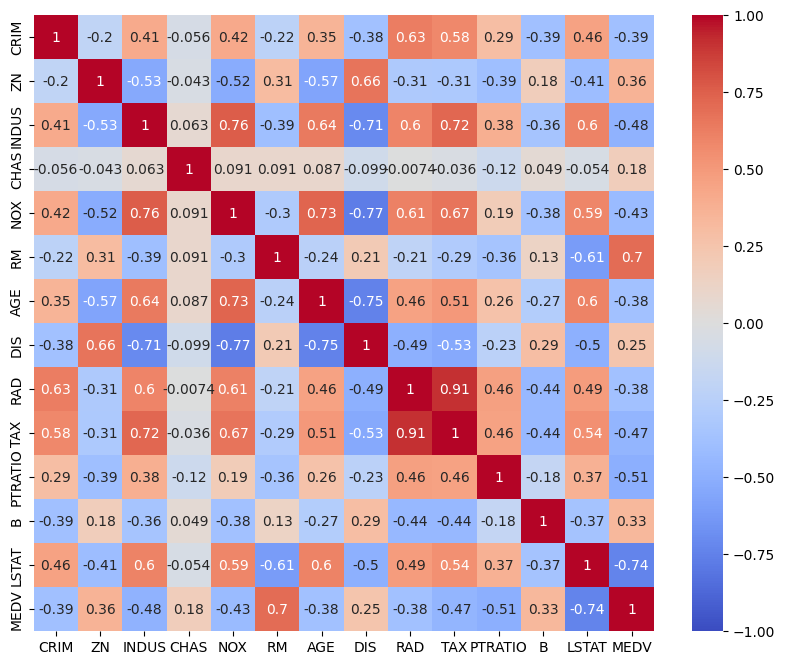

In [9]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",vmin=-1,vmax=1)

In [10]:
#cols_drop=["AGE","RAD","TAX"]
#df.drop(columns=cols_drop,inplace=True)

In [11]:
X=df.drop("MEDV",axis=1)
y=df["MEDV"]

In [12]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [13]:
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [14]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.20, random_state=42)

In [16]:
X_train.shape


(404, 13)

In [17]:
X_test.shape

(102, 13)

In [18]:
y_train

477    12.0
15     19.9
332    19.4
423    13.4
19     18.2
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: MEDV, Length: 404, dtype: float64

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error: 24.291119474973538
R-squared (R2): 0.6687594935356317


# Observation
## Dataset
1-There are 14 columns and 506 rows completely and our dependent variable is Medv which is Median value of owner-occupied homes in $1000's

2-Most of the columns are numerical no categorical variables 

3-There are no duplicates infact no missing values as well

4- Since in our data set we have columns like Indus, Nox(-0.43), Age(-0.38),Dis(0.25), Rad(-0.38) and Tax(-0.47) all of these columns are highly related so we are going to pick out only 
   three the one which have lower linearlity with our targeted variable we are going to drop it

5- I have checked by removing these columns our mse have incresesd not likely very but some so we are assuming our model tends to perform really well
   if we keep all of these rows                               
   Results after removing all of these columns:
   
Mean Squared Error: 26.349711656279904
   

R-squared (R2): 0.64068795416330937